# Python + ipynb

The goal of this assignment is to learn/review python and ipynb.
Python is a popular programming language, and also interfaced for several machine learning libraries, such as scikit-learn, Theano, and TensorFlow.
Ipynb is a digital notebook format that allows flexible incorporation of a variety of information, such as code (e.g. python), data, text (e.g. markdown, html, and Latex), images (common raster/vector graphics formats such as jpg and svg), and video (e.g. youtube).
We can also run code and experiments directly inside ipynbs.
Thus, we will use ipynb for all assignments in this class.

# Sorting 

As a starting exercise, let's try to implement a sorting function via python.
The input to the function is a python array consisting of an arbitrary sequence of numbers.
The output is a sorted sequence with numbers ranging from small to large.
The code stub, along with the test driver, are shown below.

There are various algorithms for sorting with different time complexities with respect to the array size $N$, e.g. $O(N^2)$ for bubble sort and $O(Nlog(N))$ for quick sort.
You can choose any algorithm to implement, as long as it produces correct results with reasonable run-time.

Please submit a single ipynb file, consisting of python code in a code cell and descriptions (including algorithm and analysis of complexity) in a markdown cell.
You can use this ipynb as a start, or create your own.

## Code (20 points)

Please implement your algorithm via the function below.

In [8]:
# the function

def sort(values):
    # quicksort
    # O(nlogn) for the average case
    sortedList = quickSort(values)
    # change innner reference to avoid pass by assignment
    for i in range(values.size):
        values[i] = sortedList[i]
	
def quickSort(values):
	if values.size <= 1:
		return values
	# pick up a pivot if the array has at least one element
	pivot = values[0]
	try:
		# try to get the list smaller than pivot
		# and the bigger than the pivot
		smallArray = quickSort(np.array([item for item in np.nditer(values) if item < pivot]))
		# issue solved:
		# can not use item <= pivot which will cause repetition
		middle = (np.array([item for item in np.nditer(values) if item == pivot]))
		bigArray = quickSort(np.array([item for item in np.nditer(values) if item > pivot]))

	except Exception as e:
		print (e)

	return np.concatenate((smallArray, middle, bigArray))

In [10]:
# main
import numpy as np

# different random seed
np.random.seed()

# generate numbers
N = 10
# the TA will vary the input array size and content during testing
values = np.random.random([N])

sort(values)

correct = True
for index in range(1, len(values)):
    if(values[index-1] > values[index]):
        correct = False
        
print('Correct? ' + str(correct))

Correct? True


# Line fitting
<img src="./images/01_04.png" width=50%>

Given a set of data points $\left(\mathbf{X}, \mathbf{Y}\right)$, fit a model curve to describe their relationship.

This is actually a regression problem, but we have all seen this in prior math/coding classes to serve as a good example for machine learning.

Recall $\mathbf{Y} = f(\mathbf{X}, \Theta)$ is our model.

For 2D linear curve fitting, the model is a straight line:
$y = w_1 x + w_0$, so the parameters $\Theta = \{w_0, w_1\}$.

The loss function is $L\left(\mathbf{X}, \mathbf{T}, \mathbf{Y}\right) = \sum_i \left( T^{(i)} - Y^{(i)}\right)^2 = \sum_i \left( T^{(i)} - w_1 X^{(i)} - w_0 \right)^2$.
<br>
($\mathbf{X}$ is a matrix/tensor, and each data sample is a row. We denote the ith sample/row as $\mathbf{X}^{(i)}$.)

For this simple example we don't care about regularization, thus $P(\Theta) = 0$.

The goal is to optimize $\Theta = \{w_0, w_1 \}$ with given $\left(\mathbf{X}, \mathbf{Y}\right)$ to minimize $L$.
For simple cases like this, we can directly optimize via calculus:
$$
\begin{align}
\frac{\partial L}{\partial w_0} & = 0 \\
\frac{\partial L}{\partial w_1} & = 0
\end{align}
$$


## Math (30 points)

Write down explicit formulas for $w_0$ and $w_1$ in terms of $\mathbf{X}$ and $\mathbf{T}$.

We use normal equation to infer the $w_0$ and $w_1$



In order to fit the output, we know that for 
$\mathbf{W}$ =
$ \begin{bmatrix}
    w_0  \\
    w_1
  \end{bmatrix}
$ 

it's our target to get $\mathbf{X^{'}}$$\mathbf{W}$ = $\mathbf{T}$ 

where $\mathbf{X^{'}}$  = [$\mathbf{1}$ | $\mathbf{X}$] = 
$ \begin{bmatrix}
    1 & x_0  \\
    1 & x_1 \\
    ......\\
    1 & x_n
  \end{bmatrix}
$ 

then we could find that 
$
(\mathbf{X^{'T}}$$\mathbf{X^{'}}$)$\mathbf{W}$ = $\mathbf{X^{'T}}$
$
\mathbf{T}
$


($\mathbf{X^{'T}}$$\mathbf{X^{'}}$)$^{T}$
$\mathbf{X^{'T}}$$\mathbf{X^{'}}$$\mathbf{W}$ = $\mathbf{X^{'T}}$$\mathbf{T}$



$\textbf{But we can not confirm that $\mathbf{X^{'T}}$$\mathbf{X^{'}}$ is invertable}$ so we try to use pseudo inverse (dentoe as  $\mathbf{X^{+}}$) to guarantee that we always has an inverse matrix for the $\mathbf{X^{'T}}$$\mathbf{X^{'}}$

Then we could get:

($\mathbf{X^{'T}}$$\mathbf{X^{'}}$)$^{+}$($\mathbf{X^{'T}}$$\mathbf{X^{'}}$)$\mathbf{W}$ = ($\mathbf{X^{'T}}$$\mathbf{X^{'}}$)$^{+}$$\mathbf{X^{'T}}$$\mathbf{T}$

$\mathbf{I}$$\mathbf{W}$ = ($\mathbf{X^{'T}}$$\mathbf{X^{'}}$)$^{+}$$\mathbf{X^{'T}}$$\mathbf{T}$


$ \begin{bmatrix}
    w_0  \\
    w_1
  \end{bmatrix}
$ 
=
$\mathbf{W}$ =($\mathbf{X^{'T}}$$\mathbf{X^{'}}$)$^{+}$$\mathbf{X^{'T}}$$\mathbf{T}$



## Code (50 points)

Implement your math above in the code below.

In [5]:
# line model
import numpy as np

class Line(object):
    def __init__(self, w0, w1):
        self.w0 = w0
        self.w1 = w1
        
    def predict(self, x, noise=0):
        return (x*self.w1 + self.w0 + noise*np.random.normal())

    # Input: data, a 2D array with each (x, t) pair on a row
    # Return: w0 and w1, the intercept and slope of the fitted line
    
    def learn(self, data):
    # replace the default code below which simply does random computation 
        X = data[:, 0]
        T = data[:, 1]
        # the following code is to make the matrix to be like [1, x1 
        #                                        1, x2
        #                                        1, x3..
        #                                        1, xn ]
        #
        E = np.ones((X.size,1))
        X = X.reshape(X.size, 1)
       
        augmentedMatrix = np.concatenate((E, X), axis = 1)

        
        w0, w1 = np.linalg.pinv(augmentedMatrix.transpose().dot(augmentedMatrix)).dot(augmentedMatrix.transpose().dot(T))


        
        return w0, w1
        

In [6]:
# test
np.random.seed()

w0 = np.asscalar(np.random.random(1))*2-1
w1 = np.asscalar(np.random.random(1))*2-1

line = Line(w0, w1)

N = 20
noise = 0.05
X = np.random.random([N])
T = []
for x in X:
    T.append(np.sum(line.predict(x, noise)))
T = np.array(T)    

#data = np.vstack((X, T)).transpose()
data = np.array([X, T]).transpose()

w0_fit, w1_fit = line.learn(data)

line_fit = Line(w0_fit, w1_fit)

print('truth:   ' + str(w0) + ' ' + str(w1))
print('predict: ' + str(w0_fit) + ' ' + str(w1_fit))

truth:   0.6384049833292067 -0.5437590420853846
predict: 0.610446932411 -0.483050790918


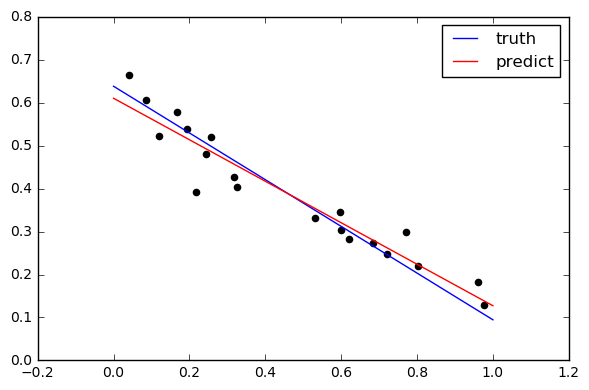

In [7]:
# plot
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(data[:, 0], data[:, 1], color='black', marker='o')

X_endpoints = [0, 1]
Y_truth, Y_fit = [], []
for x in X_endpoints:
    Y_truth.append(line.predict(x))
    Y_fit.append(line_fit.predict(x))
    
plt.plot(X_endpoints, Y_truth, color='blue', label='truth')
plt.plot(X_endpoints, Y_fit, color='red', label='predict')

plt.legend(loc='best')
plt.tight_layout()
plt.show()